## Single processing

In [1]:
model = "stereo"
import glob, os
import numpy as np
np.set_printoptions(precision=4)

if model == "stereo":
    model_path = "/home/yuheng/project/ORB_SLAM2/Examples/Stereo/"
elif model =="monocular":
    model_path = "/home/yuheng/project/ORB_SLAM2/Examples/Monocular/"
elif model == "dso":
    model_path = "/home/yuheng/project/dso/build/bin/"

#westerndesert westerndesert0 endofworld endofworld0 seasonsforest seasonsforest0  soulcity carwelding
env = "endofworld0"
Vals = ["Data_easy","Data_mid","Data_hard"]#Data_hard
FDIR="/data/iros_data/iros_data_challenge_case"  

# calculate ate rpe
eva_rpe = model_path +env+"/"+"eavaluate_rpe.txt"
eva_ate = model_path +env+"/"+"eavaluate_ate.txt"

Checking the ate of each trajactory

In [3]:
f = open(eva_ate, "r")
ate_text = f.read().split("\n")
ates={}
trajnames=[]
for idx in range(len(ate_text)-1):
    txt = ate_text[idx]
    if txt.endswith(".txt"):
        trajcode = txt.split("/")[1][:4]
        if trajcode not in trajnames:
            trajnames.append(trajcode)
            ates[trajcode]=[]
        if ate_text[idx+1].endswith(".txt") or ate_text[idx+1]=="":
            continue
        else:
            ates[trajcode].append(float(ate_text[idx+1]))
print(ates)

{'P000': [0.414905, 0.150053, 0.133167, 0.469015, 0.113587, 0.208627], 'P001': [0.053505, 0.059634, 0.06967, 0.052545, 0.061703, 0.048377], 'P002': [0.050847, 0.046716, 0.044009, 0.03052, 0.032989, 0.045424]}


In [4]:
ate_text[1]

'0.414905'

Evaluation of std

In [5]:
f = open(eva_ate, "r")
ate_text = f.read().split("\n")
trackings={}
trajnames=[]
for idx in range(len(ate_text)):
    txt = ate_text[idx]
    if txt.endswith(".txt"):
        trajcode = txt.split("/")[1][:4]
        if trajcode not in trajnames:
            trajnames.append(trajcode)
            trackings[trajcode]=[]
        try:
            truth_max = np.loadtxt(FDIR+"/"+env+"/"+trajcode+"/"+"pose_left_times.txt")[:,0].max()
            traj_max = np.loadtxt(model_path+env+"/"+txt.split("/")[1])[:,0].max()
        except:
            print(txt +" not found")
            continue 
        #check for lost tracking
        if truth_max-10 > traj_max:
            trackings[trajcode].append(False)
        else:
            trackings[trajcode].append(True)

In [6]:
atestds = {}
for key in ates.keys():
    atestds[key]=np.std(ates[key])


In [16]:
atesmeans = {}
SRs={}
for key in ates.keys():
    temp  = []
    samples = len(trackings[key])
    for i in range(samples):
        if trackings[key][i]==True:
            temp.append(ates[key][i])
    if temp != []:
        atesmeans[key]=np.mean(temp)
        SRs[key]=float(len(temp))/float(samples)
    else:
        SRs[key]=0
        atesmeans[key]=None
SRs["total SR"]=np.mean(list(SRs.values()))
print(atesmeans)
print(SRs)

{'P000': 0.24822566666666668, 'P001': 0.057572333333333336, 'P002': 0.04175083333333333, 'mean': 0.11584961111111113}
{'P000': 1.0, 'P001': 1.0, 'P002': 1.0, 'total SR': 1.0}


In [18]:
temp = []
for key in atesmeans.keys():
    if atesmeans[key]!=-1:
        temp.append(atesmeans[key])
atesmeans["total means"]=np.mean(temp)
print(atesmeans)


{'P000': 0.24822566666666668, 'P001': 0.057572333333333336, 'P002': 0.04175083333333333, 'mean': 0.11584961111111113, 'total means': 0.11584961111111113}


In [8]:
trackings

{'P000': [True, True, True, True, True, True],
 'P001': [True, True, True, True, True, True],
 'P002': [True, True, True, True, True, True]}

TODO: eliminate lost tracking

In [10]:
print("{:<8} {:<10} {:<10}".format('Key','means', "SR"))
for k in list(atesmeans.keys()):
    v = atesmeans[k]
    SR=round(SRs[k],3)
    if v is not None:
        v = round(v,4)
    else:
        v=-1
    print ("{:<8} {:<10} {:<10}".format(k, v, SR))

Key      means      SR        
P000     0.2482     1.0       
P001     0.0576     1.0       
P002     0.0418     1.0       


In [12]:
print("model: %s"%model)
print("means of %s this mean value exclude the false tracking results"%env)
print("{:<8} {:<10} {:<10}".format('Key','means', "SR"))
for k in list(atesmeans.keys()):
    v = atesmeans[k]
    SR=round(SRs[k],3)
    if v is not None:
        v = round(v,4)
    else:
        v=-1
    print ("{:<8} {:<10} {:<10}".format(k, v, SR))
print("stds of %s"%env)
print(atestds)
print("tracking success of %s"%env)
print(trackings)
print("ates of %s"%env)
print(ates)

model: stereo
means of endofworld0 this mean value exclude the false tracking results
Key      means      SR        
P000     0.2482     1.0       
P001     0.0576     1.0       
P002     0.0418     1.0       
stds of endofworld0
{'P000': 0.14089116609007898, 'P001': 0.007000450596608444, 'P002': 0.007403669572508548}
tracking success of endofworld0
{'P000': [True, True, True, True, True, True], 'P001': [True, True, True, True, True, True], 'P002': [True, True, True, True, True, True]}
ates of endofworld0
{'P000': [0.414905, 0.150053, 0.133167, 0.469015, 0.113587, 0.208627], 'P001': [0.053505, 0.059634, 0.06967, 0.052545, 0.061703, 0.048377], 'P002': [0.050847, 0.046716, 0.044009, 0.03052, 0.032989, 0.045424]}


In [13]:
atesmeans.items()

dict_items([('P000', 0.24822566666666668), ('P001', 0.057572333333333336), ('P002', 0.04175083333333333)])

In [68]:
model = "monocular"
import glob, os
import numpy as np
np.set_printoptions(precision=4)

if model == "stereo":
    model_path = "/home/yuheng/project/ORB_SLAM2/Examples/Stereo/"
elif model =="monocular":
    model_path = "/home/yuheng/project/ORB_SLAM2/Examples/Monocular/"
elif model == "dso":
    model_path = "/home/yuheng/project/dso/build/bin/"

#westerndesert westerndesert0 endofworld endofworld0 seasonsforest seasonsforest0  soulcity carwelding
# envs = ["westerndesert", "westerndesert0", "endofworld", "endofworld0", "seasonsforest",\
#        "seasonsforest0", "soulcity", "soulcity0", "carwelding", "carwelding0"]
envs=["abandonedfactory","abandonedfactory0",]
Vals = ["Data_easy","Data_mid","Data_hard"]#Data_hard
FDIR="/data/iros_data/iros_data_challenge_case"  



In [70]:
for env in envs:
# calculate ate rpe
#     env = envs[0]
    eva_rpe = model_path +env+"/"+"eavaluate_rpe.txt"
    eva_ate = model_path +env+"/"+"eavaluate_ate.txt"
    f = open(eva_ate, "r")
    ate_text = f.read().split("\n")
    ates={}
    trajnames=[]
    for idx in range(len(ate_text)-1):
        txt = ate_text[idx]
        if txt.endswith(".txt"):
            trajcode = txt.split("/")[1][:4]
            if trajcode not in trajnames:
                trajnames.append(trajcode)
                ates[trajcode]=[]
            if ate_text[idx+1].endswith(".txt") or ate_text[idx+1]=="":
                continue
            else:
                ates[trajcode].append(float(ate_text[idx+1]))

    #####################################################################
    ##calculate the success rate.
    trackings={}
    trajnames=[]
    for idx in range(len(ate_text)):
        txt = ate_text[idx]
        if txt.endswith(".txt"):
            trajcode = txt.split("/")[1][:4]
            if trajcode not in trajnames:
                trajnames.append(trajcode)
                trackings[trajcode]=[]
            try:
                truth_max = np.loadtxt(FDIR+"/"+env+"/"+trajcode+"/"+"pose_left_times.txt")[:,0].max()
                traj_max = np.loadtxt(model_path+env+"/"+txt.split("/")[1])[:,0].max()
            except:
                #print(txt +" not found")
                continue
            #check for lost tracking
            if truth_max-10 > traj_max:
                trackings[trajcode].append(False)
            else:
                trackings[trajcode].append(True)


    #####################################################################
    ##means and SR calculation
    atesmeans = {}
    SRs={}
    for key in ates.keys():
        temp  = []
        samples = len(trackings[key])
        for i in range(samples):
            if trackings[key][i]==True:
                temp.append(ates[key][i])
        if temp != []:
            atesmeans[key]=np.mean(temp)
            SRs[key]=float(len(temp))/float(samples)
        else:
            SRs[key]=0
            atesmeans[key]=None
    SRs["total"]=np.mean(list(SRs.values()))
    temp = []
    for key in atesmeans.keys():
        if atesmeans[key]!=None:
            temp.append(atesmeans[key])
    atesmeans["total"]=np.mean(temp)
    
    print(ates)
    print("means of %s with %s model"%(env,model))
    print("{:<8} {:<10} {:<10}".format('Key','means', "SR"))
    for k in list(atesmeans.keys()):
        v = atesmeans[k]
        SR=round(SRs[k],3)
        if v is not None:
            v = round(v,4)
        else:
            v=-1
        print ("{:<8} {:<10} {:<10}".format(k, v, SR))

{'P000': [14.399574, 3.922266, 14.300458, 0.996049, 13.306038, 0.222811], 'P001': [3.538021, 8.114219, 15.555854, 8.588281, 3.473008, 5.928125], 'P002': [0.668701, 0.058219, 0.055828, 0.032855, 0.037821, 0.031993]}
means of abandonedfactory with monocular model
Key      means      SR        
P000     9.3849     0.833     
P001     -1         0         
P002     0.1476     1.0       
total    4.7662     0.611     
{'P000': [0.186405, 0.141993, 0.199613, 0.110156, 0.18113, 0.169629], 'P001': [7.177504]}
means of abandonedfactory0 with monocular model
Key      means      SR        
P000     0.1648     1.0       
P001     -1         0         
total    0.1648     0.5       


https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html

In [8]:
def align(model,data):
    """
    Align two trajectories using the method of Horn (closed-form).
    From TUM

    Input:
    model -- first trajectory (3xn)
    data -- second trajectory (3xn)

    Output:
    rot -- rotation matrix (3x3)
    trans -- translation vector (3x1)
    trans_error -- translational error per point (1xn)
    """
    np.set_printoptions(precision=3,suppress=True)
    model_zerocentered = model - model.mean(1)
    data_zerocentered = data - data.mean(1)

    W = np.zeros( (3,3) )
    for column in range(model.shape[1]):
        W += np.outer(model_zerocentered[:,column],data_zerocentered[:,column])
    U,d,Vh = np.linalg.linalg.svd(W.transpose())
    S = np.matrix(np.identity( 3 ))
    if(np.linalg.det(U) * np.linalg.det(Vh)<0):
        S[2,2] = -1
    rot = U*S*Vh
    trans = data.mean(1) - rot * model.mean(1)

    model_aligned = rot * model + trans
    alignment_error = model_aligned - data

    trans_error = np.sqrt(np.sum(np.multiply(alignment_error,alignment_error),0)).A[0]

    return rot,trans,trans_error
    
    return 0


gt_path: /data/iros_data/iros_data_challenge_case/carwelding/P000/pose_left_times.txt


NameError: name 'times' is not defined

### Twc to Tcw
The traj of ground truth is not initiated from 0. we need to calculate the Tcw * W = Pc:


$$
Rcw = Rwc.T() \\
tcw = -Rcw*twc \\
Tcw * Pw = Pc 
$$
our target of visualization.

The multiplication of np is `np.dot()`

processing endofworld - P000 - 0


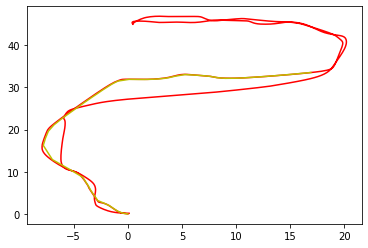

processing endofworld - P001 - 0


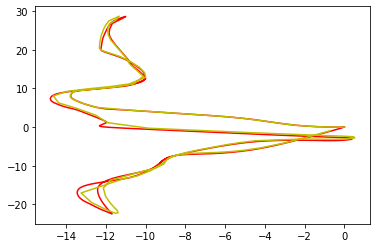

processing endofworld - P002 - 0


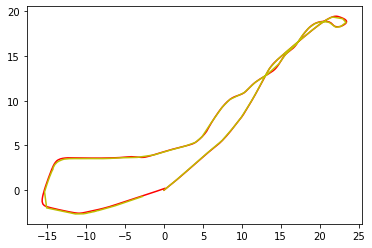

processing endofworld - P000 - 1


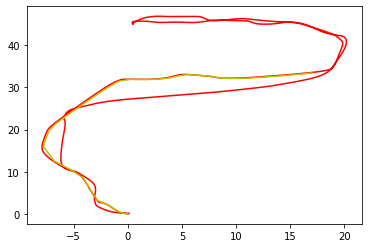

processing endofworld - P001 - 1


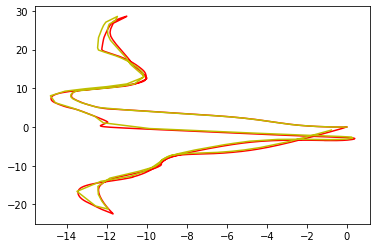

processing endofworld - P002 - 1


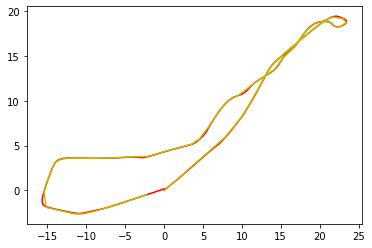

processing endofworld - P000 - 2


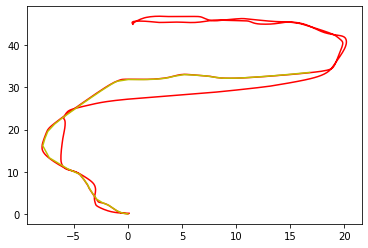

processing endofworld - P001 - 2


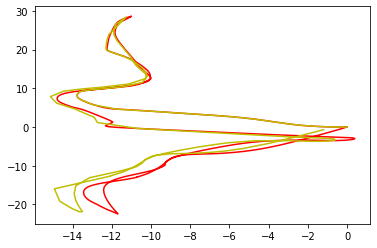

processing endofworld - P002 - 2


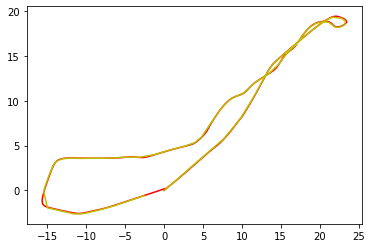

processing endofworld - P000 - 3


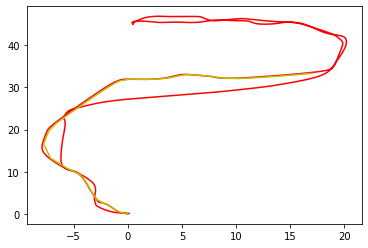

processing endofworld - P001 - 3


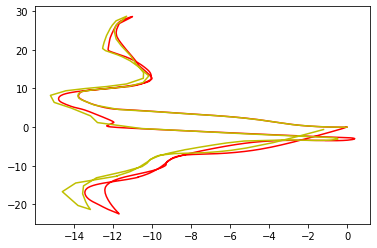

processing endofworld - P002 - 3


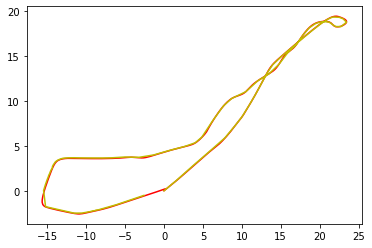

processing endofworld - P000 - 4


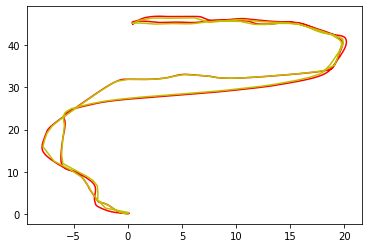

processing endofworld - P001 - 4


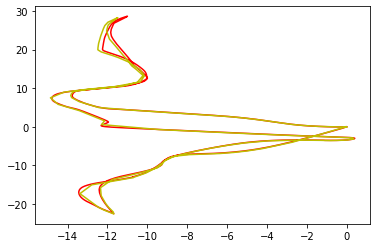

processing endofworld - P002 - 4


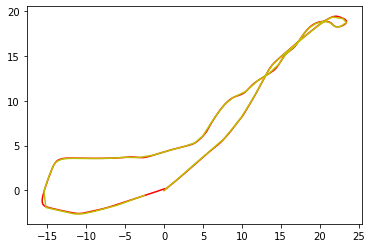

In [55]:
import os
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation
%matplotlib inline

def matrix_to_quat(matrix_data):
    #read in line
    r = [Rotation.from_dcm([m[:3],m[4:7],m[8:11]]).as_quat() for m in matrix_data]
    t = [np.array([m[3],m[7],m[11]]) for m in matrix_data]
    times = [i/8.0 for i in range(len(traj_ste_data))]
    quat = [np.concatenate((times,r[i],t[i]),axis=0) for i in range(len(r))]
    return np.array(quat)

def quat_to_matrix(quaternion):
    #input np.array
    r = Rotation.from_quat(quaternion)
    return r.as_matrix()

def to_Tcw(Rwc,twc):
    #Rwc: totation matrix
    Rcw = Rwc.transpose()
    tcw = (-1)*np.dot(Rcw,twc)
    return Rcw, tcw
    
scale_factor = 1
result_path = "/home/yuheng/project/ORB_SLAM2/Examples/Stereo"
#"/home/yuheng/project/ORB_SLAM2/Examples/Stereo/"
Envs = ["endofworld"]
base_path = "/data/iros_data/iros_data_challenge_case"
folder = ["P000","P001","P002"]

#FLAG
mode = "TUM"#KITTI
reset_initialpose = True 

f = folder[0]
#Val = Vals[2]

for i in range(5):
    for env in Envs:
        for f in folder:
            #loading the result trajectory 
            relative_path = f + "-" + str(i)+".txt"# the sub folder
            traj_path = os.path.join(result_path,env,relative_path)    
            gt_path = os.path.join(base_path, env, f ,"pose_left_times.txt")
            print("processing %s - %s - %s"%(env,f,str(i)))
            
            if os.path.isfile(gt_path) and os.path.isfile(traj_path):
                gt_data = np.loadtxt(gt_path)
                traj_data = np.loadtxt(traj_path)
            else:
                print("skip %s : %s"%(env,relative_path))
                continue
            
            if mode == "KITTI":
                ## currently work on kitti format
                times = [i/8.0 for i in range(len(traj_data))]
                traj_xyz = [np.array([m[3],m[7],m[11]]) for m in traj_data]            
            
            vis_traj = traj_data[:,1:4] 
            vis_gt = gt_data[:,1:4]
            
            if reset_initialpose:
                temp_gt = []
                Rwc = quat_to_matrix(gt_data[0,4:])
                twc = gt_data[0,1:4]
                Rcw = Rwc.transpose()
                tcw = (-1)*np.dot(Rcw,twc)
                Trans = to_Transform(Rcw,tcw)
                for gt in vis_gt:
                    gt = np.append(gt,1)
                    temp_gt.append(np.dot(Trans,gt))
                    
                vis_gt = np.array(temp_gt)
                

            plt.figure()
            plt.plot(vis_gt[:,0], vis_gt[:,1], color = "r", label = "Ground Truth")
#             plt.plot(vis_traj[:,0], vis_traj[:,1], color = "y", label = "Hard")
            plt.plot(vis_traj[:,2], vis_traj[:,0], color = "y", label = "Hard")
            plt.show() 


In [49]:
Rcw.shape

(3, 3)

In [35]:
np.hstack(Rcw,tcw)

TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

In [50]:
def to_Transform(R,t):
    t = np.expand_dims(t, axis=1)
    norm = np.array([[0,0,0,1]])
    return np.concatenate((np.concatenate((R,t),axis=1),norm),axis=0)

array([[ 0.86207968,  0.10418825, -0.495947  , -2.91048763],
       [-0.07234082,  0.99391584,  0.08305485,  3.88350791],
       [ 0.50158292, -0.03572268,  0.86437171,  1.20628098],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [41]:
tcw

array([-2.91048763,  3.88350791,  1.20628098])

In [4]:
vis_gt[0]

array([-19.2966938 ,  19.71503448,  -3.28568363])

In [58]:
!pip3 install scipy

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 26.1MB 81kB/s  eta 0:00:01
    100% |████████████████████████████████| 20.2MB 102kB/s eta 0:00:01


In [21]:
from glob import glob
glob(res_traj_path)

['/home/yuheng/project/ORB_SLAM2/Examples/Monocular/carwelding/P000-0.txt']

In [51]:
vis_gt[5:][0]

array([ 2.11808825, -3.92768788, -2.71168995])

In [41]:
gt_data[:,1:4]

array([[ 2.06795883, -3.3263011 , -2.79828477],
       [ 2.07926512, -3.46531487, -2.77831531],
       [ 2.08985829, -3.59495354, -2.75969911],
       ...,
       [ 2.26968503, -3.15558577, -2.73455501],
       [ 2.21236801, -3.39326167, -2.78350019],
       [ 2.18495846, -3.5135498 , -2.80866694]])

In [46]:
traj_data

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 1.25000000e+00,  5.68676900e-01,  1.37555900e-01,
         7.86842300e-01, -7.27190000e-03,  7.53900000e-04,
        -1.40707000e-02,  9.99874300e-01],
       [ 1.37500000e+00,  5.94777800e-01,  1.44759900e-01,
         8.22131100e-01, -7.74110000e-03,  1.09550000e-03,
        -1.55545000e-02,  9.99848400e-01],
       [ 2.50000000e+00,  7.34443700e-01,  1.84169400e-01,
         1.01518860e+00,  1.24215000e-02,  2.69227000e-02,
        -3.98720000e-02,  9.98764800e-01],
       [ 3.37500000e+00,  1.01396750e+00,  2.66563700e-01,
         1.41451750e+00,  7.51210000e-02,  9.11620000e-02,
        -8.03942000e-02,  9.89738900e-01],
       [ 4.12500000e+00,  1.42138480e+00,  3.84907400e-01,
         1.95037700e+00,  1.45456300e-01,  1.61237600e-01,
        -1.24814100e-01,  9.68125200e-01],
       [ 4.75000000e+00,  1.871915